In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../data/clean_data.csv", index_col=[1,2])
data.head()


Unnamed: 0   Team      X      Y     S     A   Dis  \
GameId     PlayId                                                              
2017090700 20170907000118           0  False  46.09  34.84  1.69  1.13  0.40   
           20170907000118           1  False  45.33  32.64  0.42  1.35  0.01   
           20170907000118           2  False  46.00  33.20  1.22  0.59  0.31   
           20170907000118           3  False  48.54  27.70  0.42  0.54  0.02   
           20170907000118           4  False  50.68  35.42  1.82  2.43  0.16   

                           Orientation     Dir      DisplayName  ...  \
GameId     PlayId                                                ...   
2017090700 20170907000118       278.01  182.82       Eric Berry  ...   
           20170907000118       332.39  161.30     Allen Bailey  ...   
           20170907000118       356.99  157.27   Justin Houston  ...   
           20170907000118         0.23  254.36  Derrick Johnson  ...   
           20170907000118       347.37  195.69       Ron Parker  ...   

                           Formation_JUMBO  Formation_PISTOL  \
GameId     PlayId                                              
2017090700 20170907000118                0                 0   
           20170907000118                0                 0   
           20170907000118                0                 0   
           20170907000118                0                 0   
           20170907000118                0                 0   

                           Formation_SHOTGUN  Formation_SINGLEBACK  \
GameId     PlayId                                                    
2017090700 20170907000118                  1                     0   
           20170907000118                  1                     0   
           20170907000118                  1                     0   
           20170907000118                  1                     0   
           20170907000118                  1                     0   

                           Formation_WILDCAT  PlayerBMI  TimeDelta  PlayerAge  \
GameId     PlayId                                                               
2017090700 20170907000118                  0  28.749228        1.0  28.692760   
           20170907000118                  0  35.993600        1.0  28.457305   
           20170907000118                  0  33.744000        1.0  28.629790   
           20170907000118                  0  30.619556        1.0  34.795430   
           20170907000118                  0  27.935571        1.0  30.061685   

                          IsRusher  YardsLeft  
GameId     PlayId                              
2017090700 20170907000118    False         35  
           20170907000118    False         35  
           20170907000118    False         35  
           20170907000118    False         35  
           20170907000118    False         35  

[5 rows x 59 columns]

In [2]:
print('\n'.join(data.columns))


Unnamed: 0
Team
X
Y
S
A
Dis
Orientation
Dir
DisplayName
JerseyNumber
Season
YardLine
Quarter
GameClock
PossessionTeam
Down
Distance
FieldPosition
HomeScoreBeforePlay
VisitorScoreBeforePlay
OffensePersonnel
DefendersInTheBox
DefensePersonnel
PlayDirection
Yards
PlayerHeight
PlayerWeight
PlayerCollegeName
Position
HomeTeamAbbr
VisitorTeamAbbr
Week
Stadium
Location
StadiumType
Turf
GameWeather
Temperature
Humidity
WindSpeed
WindDirection
DefendersInTheBox_vs_Distance
HomePossession
Field_eq_Possession
HomeField
Formation_ACE
Formation_EMPTY
Formation_I_FORM
Formation_JUMBO
Formation_PISTOL
Formation_SHOTGUN
Formation_SINGLEBACK
Formation_WILDCAT
PlayerBMI
TimeDelta
PlayerAge
IsRusher
YardsLeft


 Each play has only one rusher, so we can use that to build a dataframe with
 one row for each play.

In [3]:
plays = data.loc[data.IsRusher,:]
plays.head()


Unnamed: 0   Team       X      Y     S     A   Dis  \
GameId     PlayId                                                               
2017090700 20170907000118          18   True   41.25  30.53  3.63  3.35  0.38   
           20170907000139          40   True   48.93  27.16  3.06  2.41  0.34   
           20170907000189          62   True   71.34  19.11  5.77  2.42  0.60   
           20170907000345          84   True  104.47  25.36  4.45  3.20  0.46   
           20170907000395          98  False   29.99  27.12  3.90  2.53  0.44   

                           Orientation     Dir     DisplayName  ...  \
GameId     PlayId                                               ...   
2017090700 20170907000118       198.02  114.26     James White  ...   
           20170907000139       149.30   47.80     James White  ...   
           20170907000189       219.18  138.04     James White  ...   
           20170907000345       173.78   84.56  Mike Gillislee  ...   
           20170907000395        34.27  157.92     Kareem Hunt  ...   

                           Formation_JUMBO  Formation_PISTOL  \
GameId     PlayId                                              
2017090700 20170907000118                0                 0   
           20170907000139                0                 0   
           20170907000189                0                 0   
           20170907000345                1                 0   
           20170907000395                0                 0   

                           Formation_SHOTGUN  Formation_SINGLEBACK  \
GameId     PlayId                                                    
2017090700 20170907000118                  1                     0   
           20170907000139                  1                     0   
           20170907000189                  0                     1   
           20170907000345                  0                     0   
           20170907000395                  1                     0   

                           Formation_WILDCAT  PlayerBMI  TimeDelta  PlayerAge  \
GameId     PlayId                                                               
2017090700 20170907000118                  0  29.411224        1.0  25.596251   
           20170907000139                  0  29.411224        1.0  25.596252   
           20170907000189                  0  29.411224        2.0  25.596253   
           20170907000345                  0  29.285856        2.0  26.852933   
           20170907000395                  0  30.122595        1.0  22.091819   

                          IsRusher  YardsLeft  
GameId     PlayId                              
2017090700 20170907000118     True         35  
           20170907000139     True         43  
           20170907000189     True         65  
           20170907000345     True         98  
           20170907000395     True         25  

[5 rows x 59 columns]

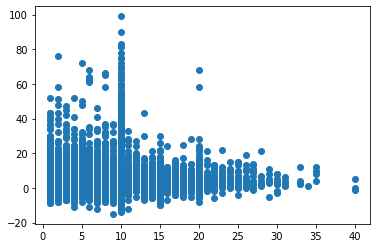

In [4]:
plt.scatter(plays.Distance,plays.Yards)
plt.show()


 How many yards did players gain?

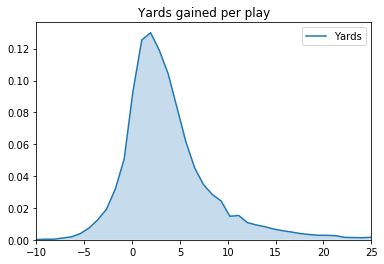

In [5]:
sns.kdeplot(plays.Yards, shade=True)
plt.xlim((-10,25))
plt.title("Yards gained per play")
plt.show()


 Do they usually gain yardage?

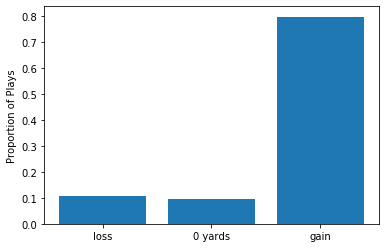

In [6]:
bars = np.array([data.Yards < 0, data.Yards == 0, data.Yards > 0])
bars = bars.sum(axis=1) / len(data.Yards)
plt.bar(['loss', '0 yards', 'gain'], bars)
plt.ylabel("Proportion of Plays")
plt.show()


 We can actually use matplotlib to build a pretty useful visualization of the
 field during the play.

(2018122306, 20181223063711)


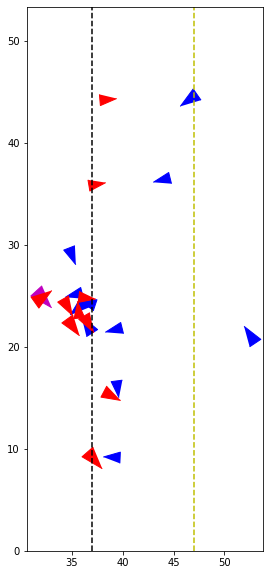

In [11]:
def rotate_points(arr, deg):
    theta = np.deg2rad(-deg)

    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    
    return np.squeeze((R @ (arr.T)).T)

cmap = {True:"red", False: "blue"}
m = np.array([(-1,-1),(1,-1),(0,2)])

def view_play(df):
    fig, ax = plt.subplots(figsize=(20,10))
    row = play.loc[play.IsRusher,:].iloc[0,:]

    ax.axvline(x=row.YardLine+10, ls="--", c='k')
    ax.axvline(x=row.YardLine+10+row.Distance, ls="--",c='y')

    ax.set_ylim((0,53.333))
    ax.set_aspect("equal")

    for i,row in play.iterrows():
        color = cmap[row.Team]
        if row.IsRusher:
            color = 'm'
        ax.scatter(row.X, row.Y, c=color, marker=rotate_points(m,row.Orientation), s=500)
    
    return fig

play_id = np.random.choice(plays.index)
play = data.loc[play_id, :]
print(play_id)
view_play(play).show()


 Note that while YardLine, YardsLeft, and most other metrics are standardized,
 the X and Y position data is not, so we have to figure out how to make sure
 that the players are on the correct side of the field etc.